In [1]:
import numpy as np
from pathlib import Path
from astropy import stats
from astropy import units as u
from astropy.modeling import models, fitting

from keckdata import KeckData, KeckDataList, fits_reader, analysis

# %matplotlib inline
# from matplotlib import pyplot as plt

/Users/jwalawender/anaconda/lib/python3.6/site-packages/scipy/__init__.py:115: UserWarning: Numpy 1.13.3 or above is required for this version of scipy (detected version 1.11.3)
  UserWarning)


2019-10-30 13:14:24     INFO: Determining read noise
2019-10-30 13:14:24     INFO:   Checking that all inputs are BIAS frames
2019-10-30 13:14:24     INFO:   Found 41 biases
2019-10-30 13:14:24     INFO: Making master bias from 40 frames
2019-10-30 13:14:24     INFO: Making master bias for each of 1 extensions


82
41


2019-10-30 13:14:54     INFO:   Done
2019-10-30 13:14:55     INFO:   Determining read noise for each of 1 extensions
2019-10-30 13:14:58     INFO:   Read Noise is 6.37 adu for extension 1
2019-10-30 13:14:58     INFO:   Generating plot for: nspec191030_0090.fits, frame 0
2019-10-30 13:14:59     INFO:   Generating read noise plot: read_noise_NIRSPEC_SPEC_CDS_ext0.png
2019-10-30 13:15:01     INFO: Determining read noise
2019-10-30 13:15:01     INFO:   Checking that all inputs are BIAS frames
2019-10-30 13:15:01     INFO:   Found 41 biases
2019-10-30 13:15:01     INFO: Making master bias from 40 frames
2019-10-30 13:15:01     INFO: Making master bias for each of 1 extensions


Read Noise (ext 0) = 18.16 electron
41


2019-10-30 13:15:30     INFO:   Done
2019-10-30 13:15:30     INFO:   Determining read noise for each of 1 extensions
2019-10-30 13:15:34     INFO:   Read Noise is 3.83 adu for extension 1
2019-10-30 13:15:34     INFO:   Generating plot for: nspec191030_0041.fits, frame 0
2019-10-30 13:15:34     INFO:   Generating read noise plot: read_noise_NIRSPEC_SPEC_MCDS16_ext0.png


Read Noise (ext 0) = 10.93 electron


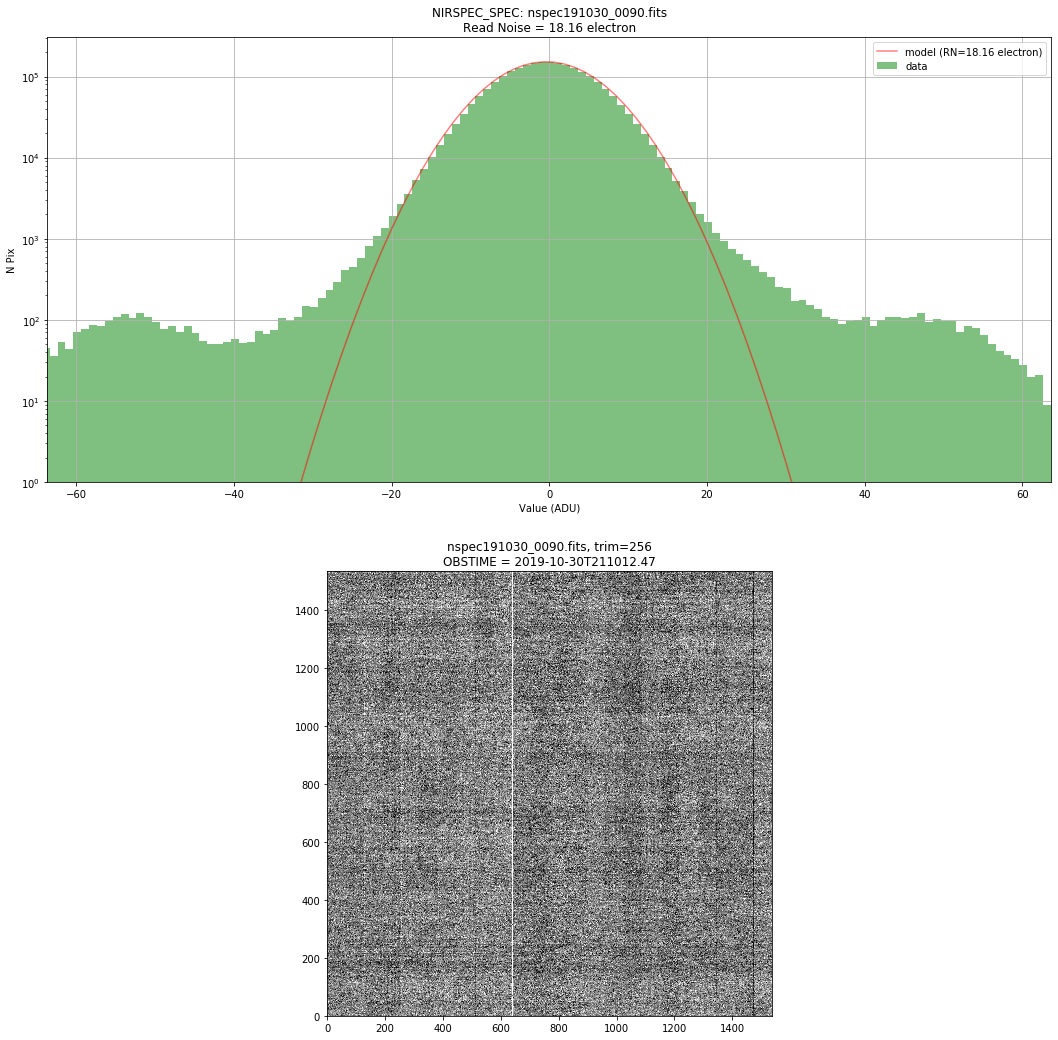

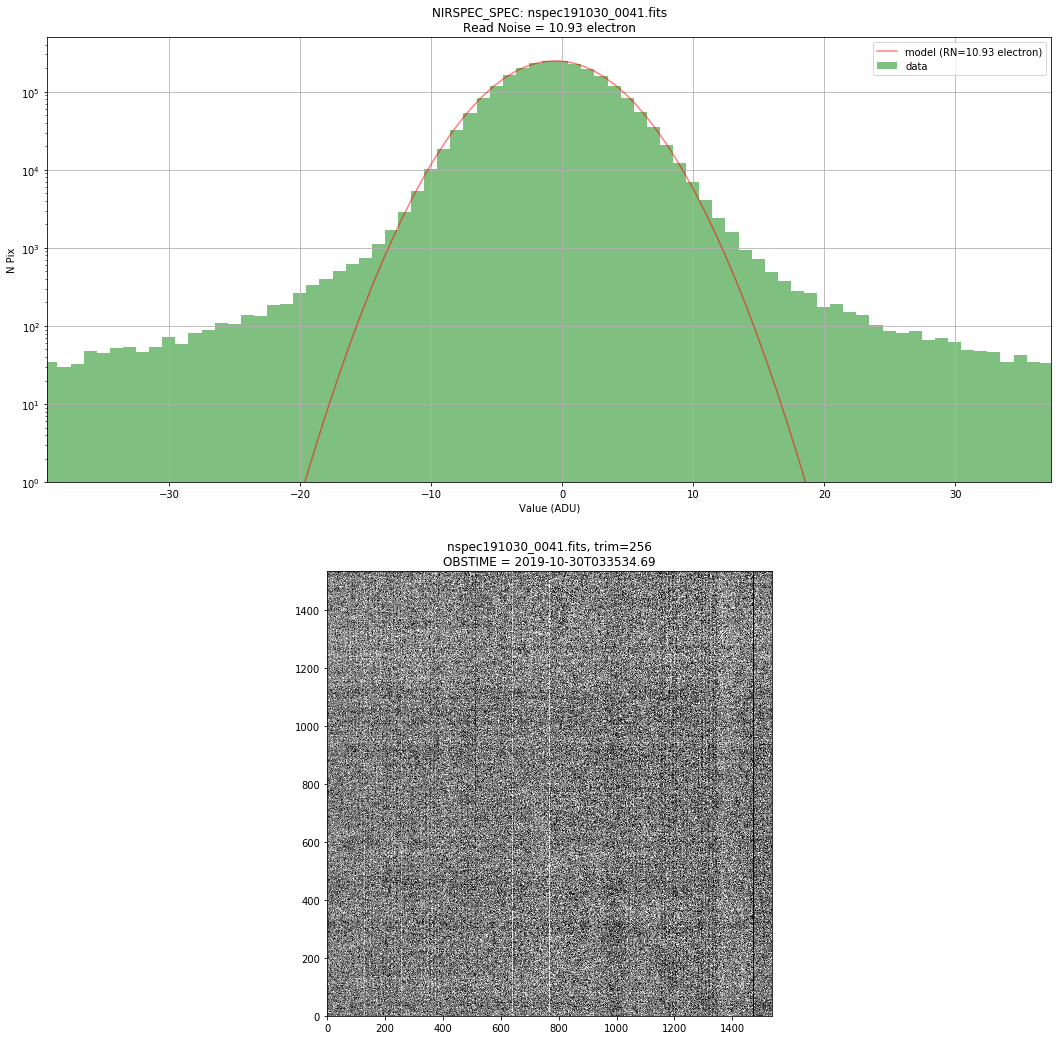

In [2]:
## NIRSPEC SPEC

nominal_gain = 2.85 * u.electron/u.adu
p_darks = Path('/Volumes/JOSHW/NIRSPEC/spec')
files = sorted([f for f in p_darks.glob('nspec*.fits')])
kdl_biasesdarks = KeckDataList(files, verbose=False)
print(kdl_biasesdarks.len)

# CDS Mode
kdl_cds = KeckDataList( [kd for kd in kdl_biasesdarks.frames if kd.readout_mode() == 'CDS'] )
print(kdl_cds.len)

RNcds = analysis.determine_read_noise(kdl_cds, plot=True, trim=256, gain=nominal_gain)
for i,r in enumerate(RNcds):
    print(f"Read Noise (ext {i}) = {r:.2f}")
del(kdl_cds)

# MCDS Mode
kdl_mcds = KeckDataList( [kd for kd in kdl_biasesdarks.frames if kd.readout_mode() == 'MCDS16'] )
print(kdl_mcds.len)

RNmcds = analysis.determine_read_noise(kdl_mcds, plot=True, trim=256, gain=nominal_gain)
for i,r in enumerate(RNmcds):
    print(f"Read Noise (ext {i}) = {r:.2f}")
del(kdl_mcds)

In [ ]:
## MOSFIRE

nominal_gain = 2.15 * u.electron/u.adu
p_darks = Path('/Volumes/JOSHW/MOSFIRE_Darks/2019oct29')
files = sorted([f for f in p_darks.glob('m*.fits')])
kdl_biasesdarks = KeckDataList(files, verbose=False)

# CDS Mode
kdl_cds = KeckDataList( [kd for kd in kdl_biasesdarks.frames if kd.readout_mode() == 'CDS'] )

RNcds = analysis.determine_read_noise(kdl_cds, plot=True, trim=256, gain=nominal_gain)
for i,r in enumerate(RNcds):
    print(f"Read Noise (ext {i}) = {r:.2f}")
del(kdl_cds)

# MCDS Mode
kdl_mcds16 = KeckDataList( [kd for kd in kdl_biasesdarks.frames if kd.readout_mode() == 'MCDS16'] )

RNmcds = analysis.determine_read_noise(kdl_mcds16, plot=True, trim=256, gain=nominal_gain)
for i,r in enumerate(RNmcds):
    print(f"Read Noise (ext {i}) = {r:.2f}")
del(kdl_mcds16)

In [ ]:
## HIRES

p_2019oct11 = Path('/Volumes/JOSHW/HIRES/2019oct11')
files = sorted([f for f in p_2019oct11.glob('*fits')])
p_2019oct12 = Path('/Volumes/JOSHW/HIRES/2019oct12')
files.extend( sorted([f for f in p_2019oct12.glob('*fits')]) )
kdl_biasesdarks = KeckDataList(files, verbose=False)

p_2019oct19 = Path('/Volumes/JOSHW/HIRES/2019oct19')
files = sorted([f for f in p_2019oct19.glob('hires*.fits')])
kdl_flats = KeckDataList(files, verbose=False)

RN = analysis.determine_read_noise(kdl_biasesdarks, plot=True, trim=256)
for i,r in enumerate(RN):
    print(f"Read Noise (ext {i}) = {r:.2f}")

master_bias = analysis.make_master_bias(kdl_biasesdarks)
DC = analysis.determine_dark_current(kdl_biasesdarks, master_bias=master_bias, plot=True, trim=256, nozero=True, usemedian=False)
print(DC)
del(kdl_biasesdarks)

g = analysis.determine_gain(kdl_flats, master_bias=master_bias, read_noise=RN, plot=True)
print(g)